In [1]:
from rd import PhotoQueues, Retrodetect
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pickle import UnpicklingError

In [2]:
#pathtodata = '/home/mike/Documents/Research/ohio/2024-10-18/AlAsBee'

#pqs = PhotoQueues(pathtodata,stopearly=5,groupby='set') #this trains the classifiers


In [46]:
rd = Retrodetect()
from glob import glob
greyscale_photo_queue = [] 
pathtoimgs = '/home/mike/Documents/Research/ohio/2024-10-18/AlAsBee/E82_SilverCone_TopMidLeft_Exp100_4Flash_Freq1/1032/M-DA3120185/'

firstimg = True
for fn in sorted(glob(pathtoimgs+'/*.np'))[:30]:
    try:
        photoitem = np.load(fn,allow_pickle=True)
    except:
        print("Failed to unpickle '%s'." % fn)
        continue
    photoitem['filename'] = fn
    rd.process_image(photoitem)
    compactfn = fn[:-3]+'_compact.compactnp'
    #rd.save_image(photoitem,compactfn,firstimg)
    greyscale_photo_queue.append(photoitem)
    firstimg = False

In [47]:
photoitem['img']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 1, ..., 1, 1, 1],
       [2, 1, 1, ..., 1, 1, 0],
       [3, 2, 2, ..., 1, 1, 1]], dtype=uint8)

In [48]:
pathtoimgs = '/home/mike/Documents/Research/ohio/2024-10-18/AlAsBee/E82_SilverCone_TopMidLeft_Exp100_4Flash_Freq1/1032/C-DA3075126/'

for fn in sorted(glob(pathtoimgs+'/*.np'))[:20]:
    try:
        photoitem = np.load(fn,allow_pickle=True)
        matching_greyscale_photoitem = [greyscale_photoitem for greyscale_photoitem in greyscale_photo_queue if photoitem['record']['triggertime']==greyscale_photoitem['record']['triggertime']][0]
        
    except:
        print("Failed to unpickle '%s'." % fn)
        continue
    

In [49]:
gspi = [greyscale_photoitem for greyscale_photoitem in greyscale_photo_queue if photoitem['record']['triggertime']==greyscale_photoitem['record']['triggertime']][0]

In [51]:
photoitem['img']

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       ...,
       [4, 4, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 2, 3, 3],
       [4, 5, 5, ..., 2, 3, 2]], dtype=uint8)

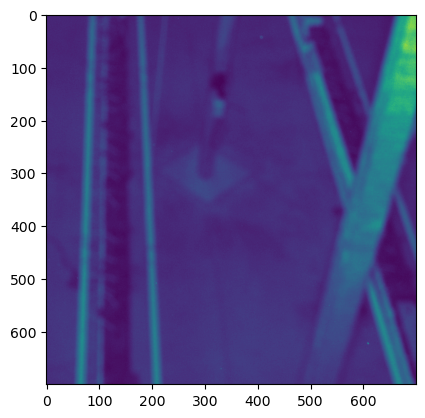

In [95]:
img = photoitem['img'][800:1500,800:1500]
img = img/np.mean(img)
plt.imshow(img)

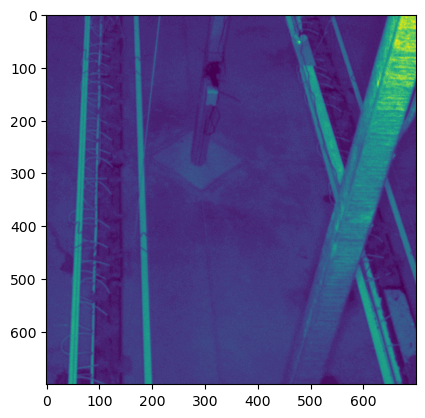

In [97]:
gsimg = gspi['img'][800:1500,800:1500]
gsimg = gsimg/np.mean(gsimg)
plt.imshow(gsimg)


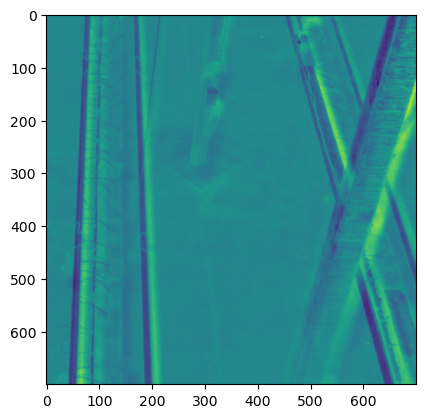

In [103]:
plt.imshow(img.astype(float)-gsimg.astype(float))#,clim=[-40,40])

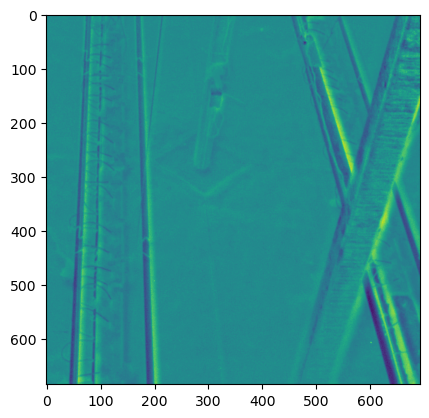

In [102]:
plt.imshow(img[15:,8:].astype(float)-gsimg[:-15,:-8].astype(float))#,clim=[-40,40])

In [71]:
from numpy.fft import fft2, ifft2
import numpy as np

#https://stackoverflow.com/a/47979802/8970017
def fft_convolve2d(x,y):
    """ 2D convolution, using FFT"""
    fr = fft2(x)
    fr2 = fft2(np.flipud(np.fliplr(y)))
    m,n = fr.shape
    cc = np.real(ifft2(fr*fr2))
    #cc = np.roll(cc, -m//2+1,axis=0)
    #cc = np.roll(cc, -n//2+1,axis=1)
    return cc

(-15, -8)

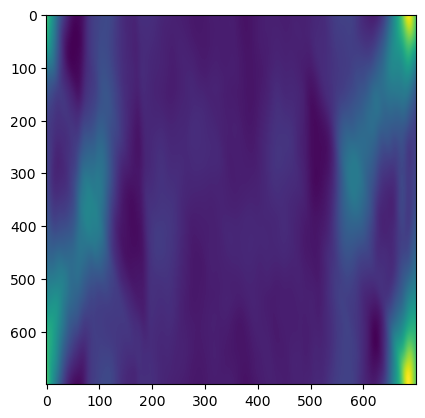

In [98]:
f = fft_convolve2d(gsimg, img)
plt.imshow(f)#[100:150,100:150])
y,x = np.unravel_index(f.argmax(), f.shape)
if x>f.shape[1]/2: x-=f.shape[1]
if y>f.shape[0]/2: y-=f.shape[0]
x,y